## Restricted Boltzmann Machines

In [3]:
%pylab inline
# import numpy
import numpy as np
from tqdm import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [227]:
# Define a shallow RBM
class rbm(object):
    def __init__(self, input_size, hidden_size):
        self.weights = self.get_weights((input_size, hidden_size))
        self.sigmoid = np.vectorize(self.sigmoid)
        self.sigmoid_delta = np.vectorize(self.sigmoid_delta)
        self.turn_on = np.vectorize(self.turn_on)
        self.schmitt = np.vectorize(self.schmitt)
        self.schmitt2 = np.vectorize(self.schmitt2)
        
    def feed_forward(self, input):
        return self.turn_on(self.sigmoid(np.dot(input, self.weights)))
    
    def get_adjust(self, input):
        forward = self.feed_forward(input)
        backward = self.feed_backward(forward)
        adjust_pos = self.schmitt2((self.schmitt((forward * self.weights))) + (self.schmitt(input * self.weights.T).T)) 
        adjust_neg = self.schmitt2(self.schmitt(forward * self.weights)+self.schmitt(backward * self.weights.T).T)
#         adjust_pos = ((forward * self.weights).T * input).T
#         adjust_neg = ((backward * self.weights.T).T * forward)
        return adjust_pos - adjust_neg
    
    def schmitt2(self, input):
        return (0 if input == 1 else 1)
    
    def schmitt(self, input):
        return (0 if input == 0 else 1)
    
    def get_adjustav(self, input, learningrate):
        adjust = learningrate * self.schmitt(self.get_adjust(input[0]))
        for i in xrange(1, len(input)):
            adjust += learningrate * self.schmitt(self.get_adjust(input[i]))
        return (adjust / len(input))
    
    def feed_backward(self, input):
        return self.turn_on(self.sigmoid(np.dot(input, self.weights.T)))
    
    def get_weights(self, dimensions):
        return np.random.normal(0,1,dimensions)
        
    def delta_func1(self, output, truths):
        return (output-truths)
    
    def turn_on(self, a):
        return (1 if a > 0.5 else 0)
    
    def sigmoid(self, z):
#         print "Z: %f" % z
        return 1/(1+np.exp(-z))
    
    def sigmoid_delta(self, z):
        return (np.exp(-z))/((1+np.exp(-z))**2)
    
print "RBM Initialized"

RBM Initialized


In [228]:
input_XOR = np.transpose(np.array([[0,0],[0,1],[1,0],[1,1]]))
gtruth_XOR = np.transpose(np.array([[0],[1],[1],[0]]))
input_AND = np.transpose(np.array([[0,0],[0,1],[1,0],[1,1]]))
gtruth_AND = np.transpose(np.array([[0],[0],[0],[1]]))

In [235]:
np.random.seed(1)
rbm1 = rbm(6,2)
# input_s = input_AND.T
training_data = np.array([[1,1,1,0,0,0],[1,0,1,0,0,0],[1,1,1,0,0,0],[0,0,1,1,1,0], [0,0,1,1,0,0],[0,0,1,1,1,0]])
input_s = training_data

In [236]:
print "Adjustf : %s" % rbm1.schmitt2((rbm1.schmitt((rbm1.feed_forward(input_s[1]) * rbm1.weights))) + (rbm1.schmitt(input_s[1] * rbm1.weights.T).T)) 
print "Adjustb1: %s" % rbm1.schmitt(rbm1.feed_backward(rbm1.feed_forward(input_s[1])) * rbm1.weights.T).T
print "Adjustb2: %s" % rbm1.schmitt(rbm1.feed_forward(input_s[1]) * rbm1.weights)
print "Adjustb : %s" % rbm1.schmitt2(rbm1.schmitt(rbm1.feed_forward(input_s[1]) * rbm1.weights)+rbm1.schmitt(rbm1.feed_backward(rbm1.feed_forward(input_s[1])) * rbm1.weights.T).T)
print "Input: %s" % input_s
print "Weights: %s" % rbm1.weights
print "Forward: %s" % rbm1.feed_forward(input_s)
print "Backward: %s" % rbm1.feed_backward(rbm1.feed_forward(input_s))
print "Adjust: %s" % rbm1.get_adjustav(input_s, 0.1)
print "Adjustin: %s" % rbm1.get_adjust(input_s[1])

print "Adjustf2: %s" % ((rbm1.feed_forward(input_s[1]) * rbm1.weights).T * input_s[1]).T
print "Adjustb: %s" % ((rbm1.feed_backward(rbm1.feed_forward(input_s[1])) * rbm1.weights.T).T * rbm1.feed_forward(input_s[1]))

Adjustf : [[1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Adjustb1: [[1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]
Adjustb2: [[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
Adjustb : [[1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
Input: [[1 1 1 0 0 0]
 [1 0 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 1 1 1 0]
 [0 0 1 1 0 0]
 [0 0 1 1 1 0]]
Weights: [[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071]]
Forward: [[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
Backward: [[1 0 1 1 1 1]
 [1 0 1 1 1 1]
 [1 0 1 1 1 1]
 [1 0 1 1 1 1]
 [1 0 1 1 1 1]
 [1 0 1 1 1 1]]
Adjust: [[ 0.05        0.05      ]
 [ 0.03333333  0.03333333]
 [ 0.          0.        ]
 [ 0.05        0.05      ]
 [ 0.06666667  0.06666667]
 [ 0.1         0.1       ]]
Adjustin: [[ 0  0]
 [ 0  0]
 [ 0  0]
 [-1  1]
 [-1  1]
 [-1  1]]
Adjustf2: [[ 1.62434536 -0.        ]
 [-0.         -0.        ]
 [ 0.86540763 -0.        ]
 [ 0.         -0.        ]
 [ 0.      

100%|██████████| 1000/1000 [00:04<00:00, 236.20it/s]


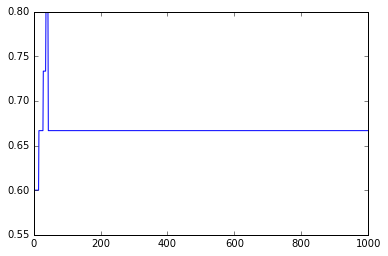

In [237]:
learningrate = 0.1
res = []
for i in tqdm(xrange(0, 1000)):
    ad = rbm1.get_adjustav(input_s, learningrate)
    res.append(np.sum(np.abs(ad)))
    rbm1.weights += ad
plot(res)

In [232]:
print "Adjust: %s" % rbm1.get_adjustav(input_s, 1)
print "Input: %s" % input_s
print "FF: %s" % rbm1.feed_forward(input_s)
print "Dream: %s" % rbm1.feed_backward(rbm1.feed_forward(input_s))

Adjust: [[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]
Input: [[1 1 1 0 0 0]
 [1 0 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 1 1 1 0]
 [0 0 1 1 0 0]
 [0 0 1 1 1 0]]
FF: [[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
Dream: [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
